In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
X = df.drop("Target", axis=1)
y = df["Target"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
tree_default = DecisionTreeRegressor(random_state=42)
tree_default.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [8]:
y_pred_train = tree_default.predict(X_train)
y_pred_test = tree_default.predict(X_test)

In [9]:
print("Train R² Score:", r2_score(y_train, y_pred_train))
print("Test R² Score:", r2_score(y_test, y_pred_test))

Train R² Score: 1.0
Test R² Score: 0.622075845135081


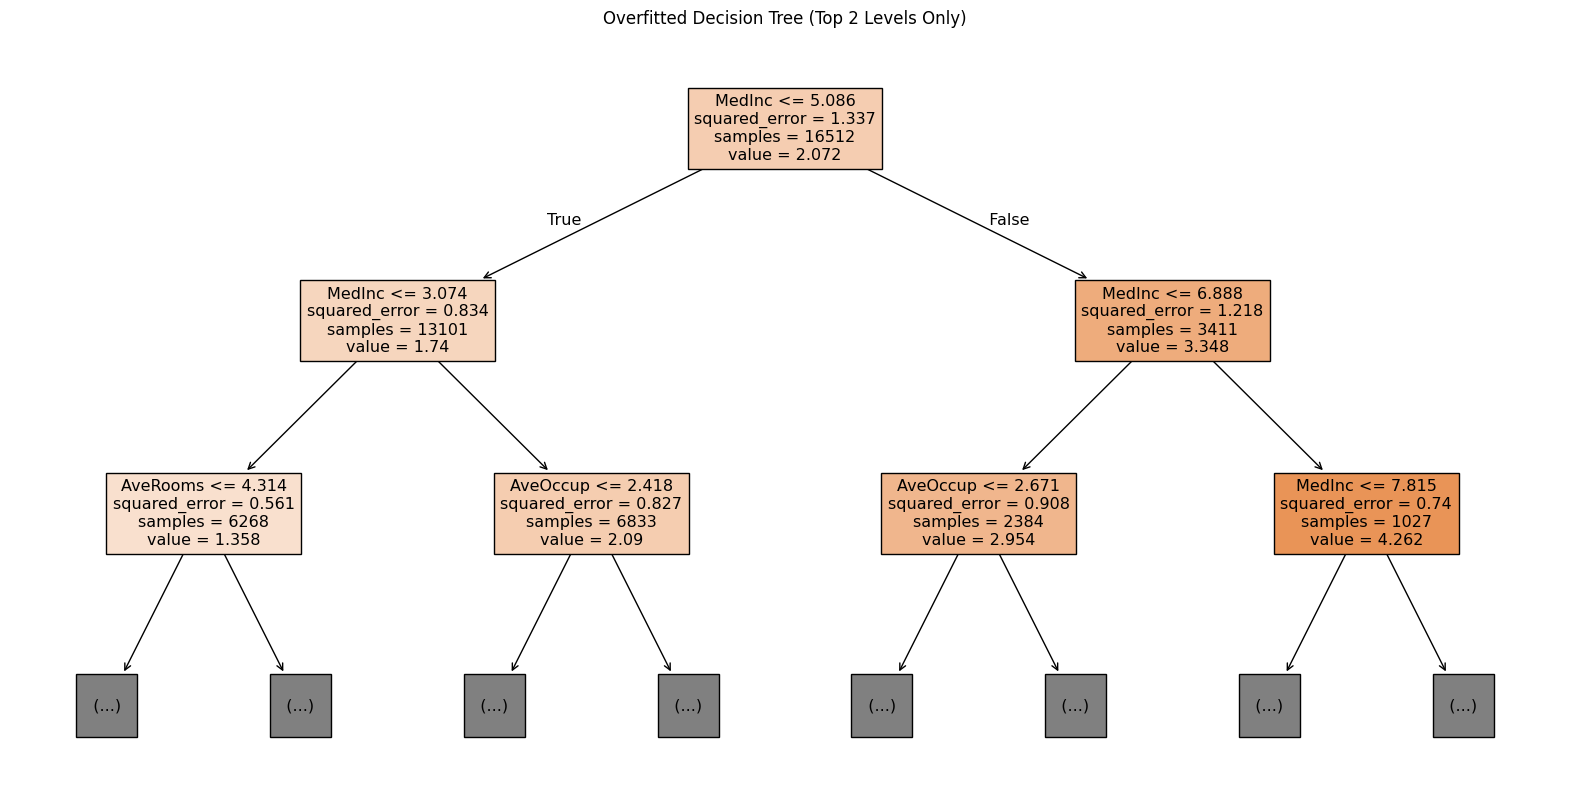

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(tree_default, filled=True, feature_names=X.columns, max_depth=2)
plt.title("Overfitted Decision Tree (Top 2 Levels Only)")
plt.show()


In [21]:
for depth in range(2, 15):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X, y, cv=5, scoring='r2')
    print(f"Depth={depth}, Mean R²={scores.mean():.4f}")


Depth=2, Mean R²=0.3838
Depth=3, Mean R²=0.4480
Depth=4, Mean R²=0.4736
Depth=5, Mean R²=0.4614
Depth=6, Mean R²=0.4779
Depth=7, Mean R²=0.5127
Depth=8, Mean R²=0.5091
Depth=9, Mean R²=0.4938
Depth=10, Mean R²=0.4744
Depth=11, Mean R²=0.4730
Depth=12, Mean R²=0.4200
Depth=13, Mean R²=0.4155
Depth=14, Mean R²=0.3874


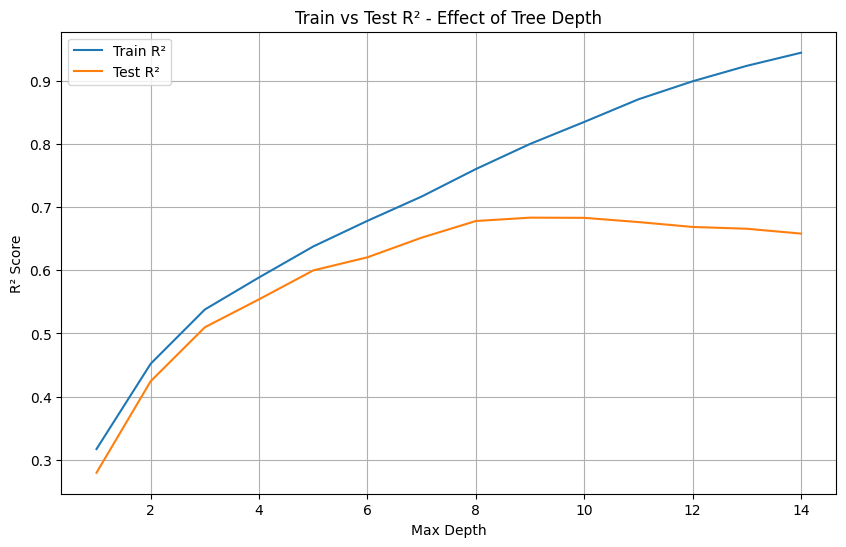

In [ ]:
depths = range(1, 15)
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label="Train R²")
plt.plot(depths, test_scores, label="Test R²")
plt.xlabel("Max Depth")
plt.ylabel("R² Score")
plt.title("Train vs Test R² - Effect of Tree Depth")
plt.legend()
plt.grid(True)
plt.show()